In [4]:
%matplotlib inline

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [104]:
wetdogfood_df = pd.read_csv('wetdogfood_clean.csv',encoding="ISO-8859-1",index_col=0)
wetdogfood_df.head()

,price,weight,product_list,maker,brand,rating,review_cnt,foodtexture
0,21.24,9.525,whole earth farms grain-free hearty beef stew,Whole Earth Farms,Whole Earth Farms,4.4,206.0,stew
1,35.99,9.375,hill's prescription diet k/d kidney care chick...,Hill's Prescription Diet,Hill's,4.6,175.0,stew
2,18.85,9.600,hill's science diet adult savory stew with bee...,Hill's Science Diet,Hill's,4.9,40.0,stew
3,25.99,9.375,blue buffalo wilderness duck & chicken grill g...,Blue Buffalo,Blue Buffalo,4.6,97.0,pate
4,18.22,9.375,nutro max large breed adult beef & rice dinner...,Nutro Max,Nutro,4.6,33.0,chunks in gravy


In [105]:
###Calculate Unit Price
wetdogfood_df['unit_price']=wetdogfood_df['price']/wetdogfood_df['weight']
#wetdogfood_df=wetdogfood_df.drop(['price','weight'],axis=1)
wetdogfood_df.sort_values(by='unit_price',ascending=False).head()

,price,weight,product_list,maker,brand,rating,review_cnt,foodtexture,unit_price
1125,50.80,0.36250,royal canin starter mousse mother & babydog,Royal Canin,Royal Canin,4.9,38.0,pate,140.137931
595,34.99,0.31250,tender & true organic turkey & liver recipe gr...,Tender & True,Tender & True,5.0,2.0,pate,111.968000
707,34.99,0.31250,tender & true organic chicken & liver recipe g...,Tender & True,Tender & True,5.0,1.0,pate,111.968000
1235,33.99,0.34375,tender & true sustainable seafood ocean whitef...,Tender & True,Tender & True,NaN,NaN,pate,98.880000
594,31.99,0.34375,tender & true antibiotic-free natural turkey &...,Tender & True,Tender & True,NaN,NaN,pate,93.061818


In [66]:
group_brand_df=wetdogfood_df.groupby('brand')
#group_brand_df.describe()

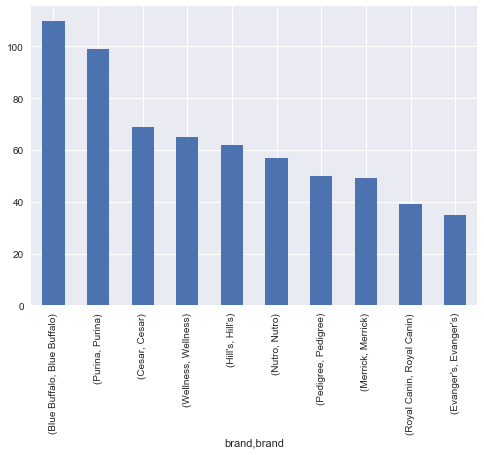

In [106]:
#group_brand_df.brand.plot.bar()
group_brand_df['brand'].value_counts().sort_values(ascending=False).head(10).plot.bar()

In [102]:
group_texture_df=wetdogfood_df[['brand','foodtexture']].groupby('foodtexture')
group_texture_df=group_texture_df.count().sort_values('brand',ascending=False).head(5)
group_texture_df.brand
#group_texture_df=group_texture_df['foodtexture'].value_counts().sort_values(ascending=False).head(5)

#pate_df.loc[wetdogfood_df.a==0,:]
#group_texture_df.boxplot(by='foodtexture', column='unit_price')
#plt.ylabel('Price per Pound ($)')

foodtexture
pate               622
stew               246
chunks in gravy    225
minced              87
shredded            33
Name: brand, dtype: int64

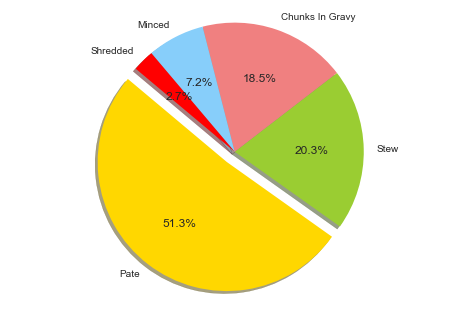

In [109]:
# Data to plot
#labels = 'Pate', 'Stew', 'Chunks in Gravy', 'Minced', 'Shredded'
labels=group_texture_df.index.str.title()
sizes = group_texture_df.brand
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

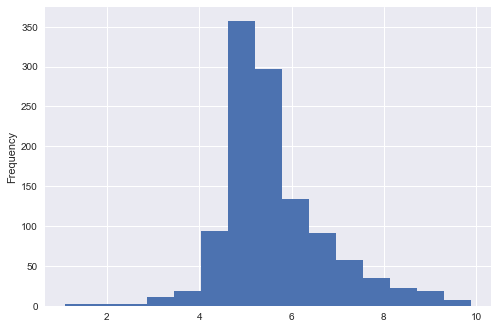

In [139]:
#score=lambda rev,rat:rat+5*(1-e** 
ratingscore_df=wetdogfood_df.drop(['price','weight','unit_price'],axis=1)
ratingscore_df['score']=ratingscore_df['rating']+5*(1-np.exp(-wetdogfood_df.review_cnt/100))
ratingscore_df.score.plot.hist(bins=15)
#ratingscore_df.review_cnt.plot.hist()
#ratingscore_df.rating.plot.hist()

In [231]:
top30_score_df=ratingscore_df.sort_values('score',ascending=False).head(30)
print(len(top30_score_df.maker.unique()))
#len(top30_score_df.brand.unique())
top30_score_df=top30_score_df.drop(['product_list','brand','rating','review_cnt','score'],axis=1)[['maker','foodtexture']]
top30_score_df=top30_score_df.groupby(['foodtexture','maker']).size()
top30_score_df


9


foodtexture      maker                           
chunks in gravy  Rachael Ray Nutrish                 1
                 Royal Canin Veterinary Diet         1
                 Taste of the Wild                   2
minced           Purina Pro Plan Veterinary Diets    1
pate             Blue Buffalo                        2
                 Hill's Prescription Diet            6
                 Natural Balance                     3
                 Redbarn                             2
                 Royal Canin Veterinary Diet         4
stew             Blue Buffalo                        1
                 Hill's Prescription Diet            6
                 Whole Earth Farms                   1
dtype: int64

In [232]:

#top30_score_df.plot(kind='bar', stacked=True)
top30_totals = top30_score_df.sum(level=0)
print (top30_totals)

foodtexture
chunks in gravy     4
minced              1
pate               17
stew                8
dtype: int64


In [233]:

top30_score_df = top30_score_df.unstack(level=1).fillna(0)
#top30_score_df.columns = top30_score_df.columns.droplevel(level=0)
print(top30_score_df)

maker            Blue Buffalo  Hill's Prescription Diet  Natural Balance  \
foodtexture                                                                
chunks in gravy           0.0                       0.0              0.0   
minced                    0.0                       0.0              0.0   
pate                      2.0                       6.0              3.0   
stew                      1.0                       6.0              0.0   

maker            Purina Pro Plan Veterinary Diets  Rachael Ray Nutrish  \
foodtexture                                                              
chunks in gravy                               0.0                  1.0   
minced                                        1.0                  0.0   
pate                                          0.0                  0.0   
stew                                          0.0                  0.0   

maker            Redbarn  Royal Canin Veterinary Diet  Taste of the Wild  \
foodtexture           

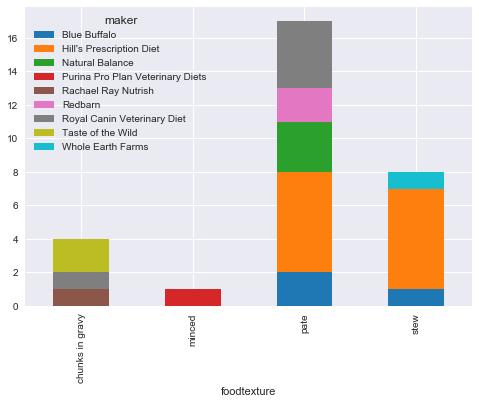

In [234]:
from matplotlib import cm
top30_score_df.plot(kind='bar', stacked=True,colormap=cm.Vega10)

In [ ]:
plt.bar(texture), counts['M'], bottom=None, color='blue', label='M')
plt.bar(ages, counts['F'], bottom=counts['M'], color='pink', label='F')
plt.legend()
plt.xlabel('Ages')
plt.ylabel('Count')